# Supervised Models: Perceptrons and Support Vector Machines (SVM)

In [1]:
from IPython.display import Image
%matplotlib inline

## Concept of Linearly Separable Dataset

A **linearly separable dataset** is one in which the data points from two different classes can be perfectly separated by a straight line (in 2D), or a hyperplane (in higher dimensions). In simpler terms, there exists a linear decision boundary that can divide the dataset into two distinct groups, where each group corresponds to one of the classes.

### What is a Hyperplane?

In geometry, it is an n-dimensional generalization of a plane, a subspace with one less dimension $(n-1)$ than its origin space. In one-dimensional space, it is a point, In two-dimensional space it is a line, In three-dimensional space, it is an ordinary plane, in four or more dimensional spaces, it is then called a ‘Hyperplane’. The dimensions are the features represented in the data. For example, say we want to carry out a classification problem and we want to be able to tell if a product gets purchased or not(a binary classification), if there is just one feature (say Gender) available as a feature in the dataset, then it is in one-dimensional space and the subspace (the separating/decision boundary) representation will be $(n-1=0)$ a 0-dimensional space, represented with just a point showing the separation of classes (Purchased or not). If there are two features(Age and Gender), it is a two-dimensional space (2D), with either of Age and Gender on the $X$ and $Y$-axis, the decision boundary will be represented as a simple line. Similarly, if the features are three(Age, Gender, Income), the decision boundary will be a two-dimensional plane in a three-dimensional space. Furthermore, if we have a four or more dimensional space data points, then it is called a ‘Hyperplane’ with $n-1$ dimension. 

The Hyperplane is simply a concept that separates an n-dimensional space into two groups/halves. In machine learning terms, it is a form of a decision boundary that algorithms like the Support Vector Machine uses to classify or separate data points. There are two parts to it, the negative side hyperplane and the positive part hyperplane, where data points/instances can lie on either part, signifying the group/class they belong to.

<img src="../05-pictures/lesson-3-2_pic_0.png" width=600 height=100 align='center'/>

### Key Characteristics:
1. **2D Case**: In a two-dimensional dataset, the two classes can be separated by a straight line.
2. **Line Equation**: The separating line can be defined by the equation:

   $$
   w_1 x_1 + w_2 x_2 + b = 0
   $$

Where:
   - $x_1$ and $x_2$ are the features of the data points.
   - $w_1$ and $w_2$ are the weights (coefficients) that define the orientation of the line.
   - $b$ is the bias, which shifts the line vertically.

### Problem Definition

Consider a simple 2D problem where each data point has two features ($x_1$ and $x_2$), and we want to classify them into two categories (let's call them Class 1 and Class 2). A line can be drawn to separate the data points of Class 1 from those of Class 2.

**Example Dataset:**

- Class 1: Points that lie on one side of the line (e.g., above the line).
- Class 2: Points that lie on the other side of the line (e.g., below the line).

### Visualizing the Separating Line

For a 2D dataset, the equation of the line can be written as:

$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$

This equation will give the corresponding $x_2$ values (the vertical axis) for any given $x_1$ values (the horizontal axis). 


We can plot this line and the data points to visually verify the separability.


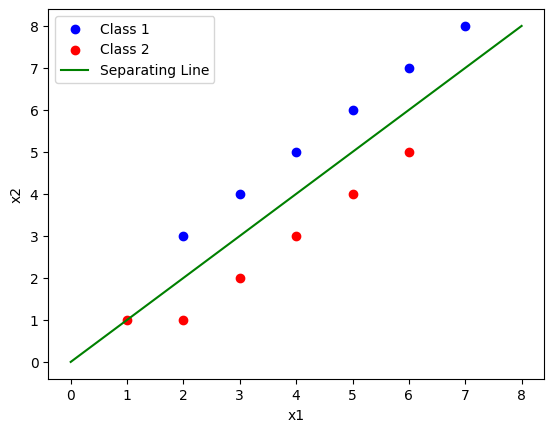

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple linearly separable dataset (2D)
# Class 1: points above the line y = x
# Class 2: points below the line y = x
X = np.array([[2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]])  # Class 1
y = np.array([1, 1, 1, 1, 1, 1])  # Labels for Class 1

X2 = np.array([[1, 1], [2, 1], [3, 2], [4, 3], [5, 4], [6, 5]])  # Class 2
y2 = np.array([0, 0, 0, 0, 0, 0])  # Labels for Class 2

X_combined = np.vstack([X, X2])
y_combined = np.concatenate([y, y2])

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class 2')

# Create a separating line y = x
x_values = np.linspace(0, 8, 100)
y_values = x_values  # y = x for the line

plt.plot(x_values, y_values, color='green', label='Separating Line')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Calculating the Separating Line

To calculate the line that separates the two classes, we can use the **Perceptron algorithm** or another classifier to find the optimal weights $w_1$, $w_2$, and bias $b$ that define the separating line.

### Geometrical Interpretation of the Vector $W$

the set of weights $(w_1, w_2)$ is nothing more than a vector $W$. But what exactly does $W$ represent? We can easily verify that the vector $\mathbf{w} = (w_1, w_2)$ is perpendicular to the line $w_1 x_1 + w_2 x_2 + b = 0$. To demonstrate this relationship we can use the following argument based on the properties of the dot product.

**Step 1: Consider Two Points on the Line**

Let $\mathbf{x} = (x_1, x_2)$ and $\mathbf{y} = (y_1, y_2)$ be any two distinct points on the line. Because both points lie on the line, they satisfy the equation:

$$
w_1 x_1 + w_2 x_2 + b = 0 \quad \text{and} \quad w_1 y_1 + w_2 y_2 + b = 0.
$$

**Step 2: Form a Tangent Vector to the Line**

A vector that is tangent to the line can be obtained by taking the difference between the two points:

$$
\mathbf{v} = \mathbf{y} - \mathbf{x} = (y_1 - x_1, \, y_2 - x_2).
$$

**Step 3: Show That $\mathbf{w}$ is Perpendicular to $\mathbf{v}$**

To show that $\mathbf{w}$ is perpendicular to the tangent vector $\mathbf{v}$, we need to demonstrate that their dot product is zero:

$$
\mathbf{w} \cdot \mathbf{v} = w_1 (y_1 - x_1) + w_2 (y_2 - x_2).
$$

**Step 4: Use the Line Equations**

Since both $\mathbf{x}$ and $\mathbf{y}$ lie on the line, we have:

$$
w_1 x_1 + w_2 x_2 + b = 0 \quad \Rightarrow \quad w_1 x_1 + w_2 x_2 = -b,
$$

$$
w_1 y_1 + w_2 y_2 + b = 0 \quad \Rightarrow \quad w_1 y_1 + w_2 y_2 = -b.
$$

Subtract the first equation from the second:

$$
(w_1 y_1 + w_2 y_2) - (w_1 x_1 + w_2 x_2) = -b - (-b) = 0.
$$

This simplifies to:

$$
w_1 (y_1 - x_1) + w_2 (y_2 - x_2) = 0.
$$

**Step 5: Conclude Perpendicularity**

Since

$$
\mathbf{w} \cdot \mathbf{v} = 0,
$$

the vector $\mathbf{w} = (w_1, w_2)$ is orthogonal to the tangent vector $\mathbf{v}$ of the line. Because $\mathbf{v}$ is an arbitrary tangent vector to the line, this proves that $\mathbf{w}$ is perpendicular to the separating line.

### Describing Points Above or Below the Line

Because the vector $ \mathbf{w} $ is perpendicular to the line, we can use it to “step off” the line in a controlled way. Specifically, consider any point of the form

$$
\mathbf{x} = \mathbf{x}_0 + \alpha\, \mathbf{u},
$$

where:
- $\mathbf{x}_0$ is a point on the line (so that $w_1 x_{1,0} + w_2 x_{2,0} + b = 0$),
- $\mathbf{u}$ is a unit vector in the direction of $ \mathbf{w} $, i.e.,

  $$
  \mathbf{u} = \frac{(w_1, w_2)}{\|\mathbf{w}\|},
  $$
  
- and $\alpha$ is a scalar.

Now, depending on the sign of $\alpha$, the point $\mathbf{x}$ will lie on one side of the line or the other:
- If $\alpha > 0$, then $\mathbf{x}$ lies in the direction of $ \mathbf{w} $ (which we will call “above” the line).
- If $\alpha < 0$, then $\mathbf{x}$ lies in the direction opposite to $ \mathbf{w} $ (which we will call “below” the line).

**Evaluating the Linear Combination**

Let’s compute the value of

$$
f(\mathbf{x}) = w_1 x_1 + w_2 x_2 + b,
$$

for the point

$$
\mathbf{x} = \mathbf{x}_0 + \alpha\, \mathbf{u}.
$$

Substitute $\mathbf{x}$ into $f$:

$$
\begin{aligned}
f(\mathbf{x}) &= w_1 (x_{1,0} + \alpha u_1) + w_2 (x_{2,0} + \alpha u_2) + b \\
&= \bigl(w_1 x_{1,0} + w_2 x_{2,0} + b\bigr) + \alpha \bigl(w_1 u_1 + w_2 u_2\bigr).
\end{aligned}
$$

Since $\mathbf{x}_0$ lies on the line, the first term is zero:

$$
w_1 x_{1,0} + w_2 x_{2,0} + b = 0.
$$

Now, consider the second term. Because $\mathbf{u}$ is the unit vector in the direction of $\mathbf{w}$:

$$
w_1 u_1 + w_2 u_2 = \mathbf{w} \cdot \mathbf{u} = \|\mathbf{w}\| \, \|\mathbf{u}\| \, \cos(0) = \|\mathbf{w}\| \cdot 1 \cdot 1 = \|\mathbf{w}\|.
$$

Thus, we have:

$$
f(\mathbf{x}) = \alpha \|\mathbf{w}\|.
$$

**Interpreting the Result**

1. **For Points Above the Line:**

   When $\alpha > 0$, we get

   $$
   f(\mathbf{x}) = \alpha \|\mathbf{w}\| > 0,
   $$
   
   because $\|\mathbf{w}\|$ is a positive quantity. Hence, all points that are a positive distance $\alpha$ from the line (in the direction of $ \mathbf{w} $) yield

   $$
   w_1 x_1 + w_2 x_2 + b > 0.
   $$

2. **For Points Below the Line:**

   When $\alpha < 0$, we obtain

   $$
   f(\mathbf{x}) = \alpha \|\mathbf{w}\| < 0,
   $$
   
   so all points that are a negative distance $\alpha$ from the line (opposite to the direction of $ \mathbf{w} $) yield

   $$
   w_1 x_1 + w_2 x_2 + b < 0.
   $$

This demonstration shows that by expressing any point as a shift from a point on the decision boundary along the direction of the normal vector $ \mathbf{w} $, we obtain a clear relationship:

- Points in the direction of $ \mathbf{w} $ (above the line) yield $w_1 x_1 + w_2 x_2 + b > 0$.
- Points in the opposite direction (below the line) yield $w_1 x_1 + w_2 x_2 + b < 0$.

Thus, the sign of $w_1 x_1 + w_2 x_2 + b$ can be used to correctly classifies points relative to the separating line.

### How to Classify a New Point Given the Separating Line

Given a linearly separable dataset and a separating line $ w_1 x_1 + w_2 x_2 + b = 0 $, we can classify a new point by calculating the value of the linear combination $ w_1 x_1 + w_2 x_2 + b $. Here's how the classification works:

1. **Calculate the Linear Combination**:
   
   For a new point $\vec{x}= (x_1, x_2) $, compute the value of:
   
   $$
   f(\vec{x}) = w_1 x_1 + w_2 x_2 + b
   $$
   
   This gives a scalar value.

<p></p>

2. **Determine the Class**:
   - If the linear combination is greater than or equal to 0 ($ \geq 0 $), we classify the point as belonging to **Class 1** (above the line).
   - If the linear combination is less than 0 ($ < 0 $), we classify the point as belonging to **Class 2** (below the line).

The separating line is essentially the decision boundary. Any point on the line will have a linear combination equal to 0, while points on either side of the line will yield positive or negative values, indicating which class the point belongs to.

**Example**

Let’s assume the following values for the separating line:
- $ w_1 = 1 $
- $ w_2 = -1 $
- $ b = 0.5 $

We will now classify two new points:
- Point A: $ (x_1 = 3, x_2 = 2) $ (above the line)
- Point B: $ (x_1 = 2, x_2 = 3) $ (below the line)

**Step 1: Calculate the Linear Combination for Point A**

For point A ($ x_1 = 3, x_2 = 2 $):

$$
w_1 x_1 + w_2 x_2 + b = (1 \times 3) + (-1 \times 2) + 0.5 = 3 - 2 + 0.5 = 1.5
$$

<p></p>

Since the linear combination is **greater than 0** ($ 1.5 \geq 0 $), point A is classified as **Class 1** (above the line).

**Step 2: Calculate the Linear Combination for Point B**

For point B ($ x_1 = 2, x_2 = 3 $):

$$
w_1 x_1 + w_2 x_2 + b = (1 \times 2) + (-1 \times 3) + 0.5 = 2 - 3 + 0.5 = -0.5
$$

<p></p>

Since the linear combination is **less than 0** ($ -0.5 < 0 $), point B is classified as **Class 2** (below the line).

**Summary of Results:**

- Point A (3, 2): The linear combination is 1.5, so the point is classified as **Class 1** (above the line).
- Point B (2, 3): The linear combination is -0.5, so the point is classified as **Class 2** (below the line).

This process of calculating the linear combination and using it to classify a point is at the core of how a perceptron or linear classifier works. The sign of the linear combination determines the class of the point relative to the separating line.

## The Perceptron

The **Perceptron** is one of the simplest types of artificial neural networks and is considered a foundational algorithm in machine learning and neural network theory. It was introduced by Frank Rosenblatt in 1958 and is primarily used for binary classification tasks, i.e., determining whether an input belongs to one of two classes.

A Perceptron works by classifying input vectors through a linear decision boundary, which is adjusted during the training phase to minimize classification errors.

### Structure of a Perceptron:

1. **Input layer**: The perceptron has multiple inputs, where each input $ x_i $ represents a feature of the data.
2. **Weights**: Each input has an associated weight $ w_i $. The weight determines the importance of the corresponding input feature in the classification decision.
3. **Bias**: A bias term $ b $ is used to shift the decision boundary and provide more flexibility in the classification.
4. **Activation Function**: The perceptron uses a step activation function, which produces an output of either 0 or 1 based on whether the weighted sum of inputs exceeds a certain threshold.

The mathematical formulation of the perceptron is as follows:

$$
y = \begin{cases} 
1 & \text{if } \sum\limits_{i=1}^{n} w_i x_i + b \geq 0 \\
&\\
0 & \text{if } \sum\limits_{i=1}^{n} w_i x_i + b < 0
\end{cases}
$$

Where:
- $ x_i $ are the input features
- $ w_i $ are the weights
- $ b $ is the bias
- $ y $ is the output class (1 or 0)

The output is binary, meaning that it will predict one of two classes.

### Training the Perceptron:

The perceptron is trained using a **supervised learning** algorithm. The goal of training is to adjust the weights and bias to correctly classify the input data. The Perceptron uses the following update rule during training:

1. Initialize the weights and bias to small random values.
2. For each training sample $ (x^{(i)}, y^{(i)}) $:
   - Calculate the predicted output $ \hat{y}^{(i)} = \text{sign}(w \cdot x^{(i)} + b) $
   - If $ \hat{y}^{(i)} \neq y^{(i)} $, update the weights and bias:
   
     $$ w_i \leftarrow w_i + \eta (y^{(i)} - \hat{y}^{(i)}) x_i^{(i)} $$
     
     $$ b \leftarrow b + \eta (y^{(i)} - \hat{y}^{(i)}) $$

Where:
- $ \eta $ is the learning rate
- $ \hat{y}^{(i)} $ is the predicted output for the input $ x^{(i)} $
- $ y^{(i)} $ is the actual class for the input

### Convergence and Limitations:

The perceptron algorithm converges to a solution if the classes are linearly separable (i.e., there is a linear decision boundary that can perfectly separate the two classes). If the classes are not linearly separable, the perceptron will not converge and may fail to find a solution.

### Python Example: Implementing the Perceptron

Here's an implementation of the perceptron in Python using a basic dataset:

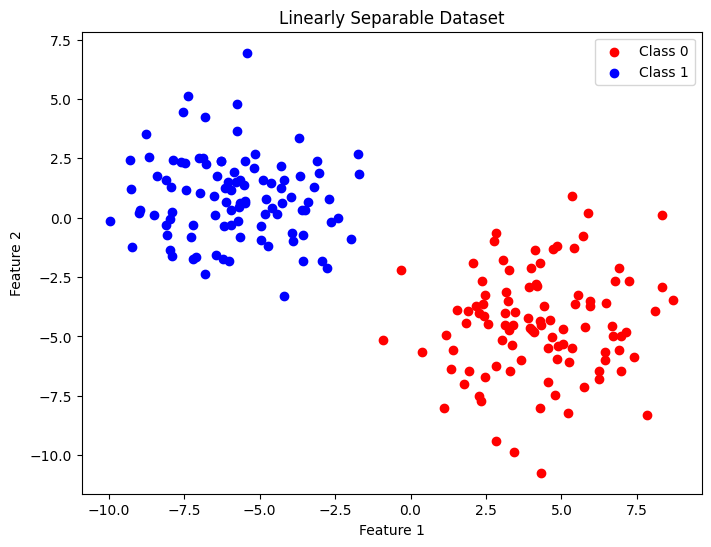

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a linearly separable dataset
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                  random_state=123, cluster_std=2.0)

# Visualize the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [6]:
import numpy as np

class Perceptron:
    """
    A simple implementation of a Perceptron for binary classification.

    The Perceptron is a linear classifier that uses a step function as its activation.
    It learns a weight vector and a bias term to separate input data into two classes.
    
    Attributes:
        weights (numpy.ndarray): The weight vector for the input features.
        bias (float): The bias term added to the linear combination of inputs.
        learning_rate (float): The step size used during the weight update.
        epochs (int): The number of iterations over the entire training dataset.
    """
    
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        """
        Initialize the Perceptron.

        Parameters:
            input_size (int): The number of features in the input data.
            learning_rate (float): The learning rate for updating weights and bias.
            epochs (int): The number of times the training algorithm will iterate over the training set.
        """
        # Initialize the weights to a vector of zeros with length equal to input_size.
        self.weights = np.zeros(input_size)
        # Initialize the bias term to 0.
        self.bias = 0.0
        # Set the learning rate (step size for updates).
        self.learning_rate = learning_rate
        # Set the number of epochs (iterations over the entire dataset).
        self.epochs = epochs
    
    def activate(self, x):
        """
        Step activation function.

        Parameters:
            x (float): The input value (typically the linear combination of features and weights).
        
        Returns:
            int: Returns 1 if x is greater than or equal to 0, otherwise returns 0.
        """
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        """
        Predict the class label for a given input.

        This method computes the linear combination of the input features and the weights,
        adds the bias, and then applies the step activation function.

        Parameters:
            x (numpy.ndarray): The input vector for which to predict the class label.
        
        Returns:
            int: The predicted class label (either 0 or 1).
        """
        # Compute the weighted sum (linear combination) of the input features plus bias.
        linear_output = np.dot(x, self.weights) + self.bias
        # Apply the step activation function to determine the class.
        return self.activate(linear_output)
    
    def train(self, X, y):
        """
        Train the Perceptron on the given dataset.

        The training process involves iterating over the dataset for a set number of epochs.
        For each sample, the algorithm computes the prediction and updates the weights
        and bias based on the error (difference between actual and predicted values).

        Parameters:
            X (numpy.ndarray): The input dataset with each row as a sample.
            y (numpy.ndarray): The target labels corresponding to each sample in X.
        """
        # Loop over the specified number of epochs.
        for epoch in range(self.epochs):
            # Iterate over each sample in the dataset.
            for i in range(len(X)):
                # Compute the prediction for the i-th sample.
                prediction = self.predict(X[i])
                # Compute the error (difference between true label and prediction).
                error = y[i] - prediction
                # Update the weights: add the product of learning rate, error, and input features.
                self.weights += self.learning_rate * error * X[i]
                # Update the bias: add the product of learning rate and error.
                self.bias += self.learning_rate * error
                
    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the Perceptron on a given dataset.

        This method calculates the proportion of correct predictions over the entire dataset.

        Parameters:
            X (numpy.ndarray): The input dataset with each row as a sample.
            y (numpy.ndarray): The true labels for each sample in X.
        
        Returns:
            float: The accuracy of the model as a fraction between 0 and 1.
        """
        # Initialize a counter for correct predictions.
        correct_predictions = 0
        # Iterate over each sample in the dataset.
        for i in range(len(X)):
            # If the prediction matches the true label, increment the counter.
            if self.predict(X[i]) == y[i]:
                correct_predictions += 1
        # Calculate accuracy as the ratio of correct predictions to total samples.
        accuracy = correct_predictions / len(X)
        return accuracy

Training Accuracy: 100.00%


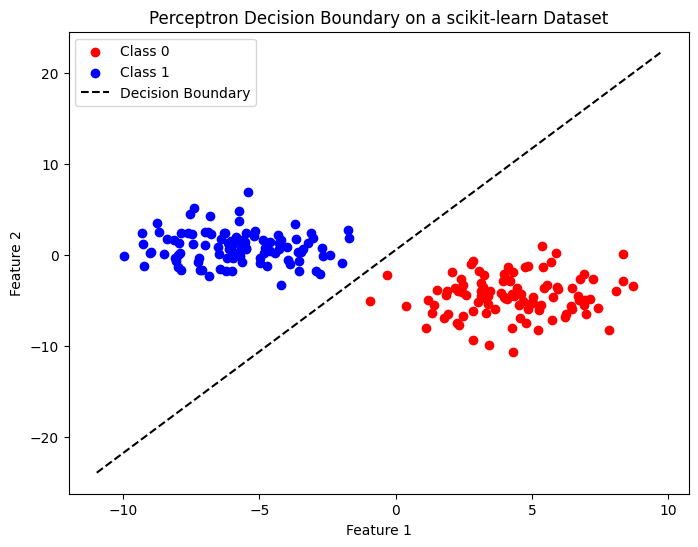

In [7]:
# Initialize the perceptron with 2 inputs
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=20)
    
# Train the perceptron on the dataset
perceptron.train(X, y)
    
# Evaluate the model
accuracy = perceptron.evaluate(X, y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")
    
# Plot the decision boundary learned by the perceptron
# The decision boundary is given by: w1*x1 + w2*x2 + b = 0
# Solve for x2: x2 = -(w1/w2)*x1 - b/w2
x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
if perceptron.weights[1] != 0:
    x2_vals = -(perceptron.weights[0] / perceptron.weights[1]) * x1_vals - perceptron.bias / perceptron.weights[1]
else:
    # If weights[1] is zero, the decision boundary is vertical.
    x1_vals = np.full(100, -perceptron.bias / perceptron.weights[0])
    x2_vals = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
plt.title("Perceptron Decision Boundary on a scikit-learn Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

At the end of the training the perceptron will make its best prediction, having learned its weights and its bias. But the prediction could be wrong. Can we understand why? Let's try to identify the problem simply by looking at the graph. **How many different lines can we draw that separate the two subsets of data?**

### Matrix Notation

To generalize the perceptron formulation using matrix notation, we first express the linear combination in vectorized form and then show how this extends to a collection of samples.

**Single Sample Formulation**

The original formulation for a single sample is:

$$
y = \begin{cases} 
1 & \text{if } \sum\limits_{i=1}^{n} w_i x_i + b \geq 0 \\
& \\
0 & \text{if } \sum\limits_{i=1}^{n} w_i x_i + b < 0
\end{cases}
$$

We can rewrite the sum using the dot product notation. Let:

$$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^{n}$$ 

be the feature vector,

$$\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} \in \mathbb{R}^{n}$$ 

be the weight vector and $b$ be the bias (a scalar). Then, the linear combination is written as:

$$
\mathbf{w}^\top \mathbf{x} + b.
$$

and the decision rule becomes:

$$
y = \begin{cases} 
1 & \text{if } \mathbf{w}^\top \mathbf{x} + b \geq 0 \\
& \\
0 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0
\end{cases}
$$

**Incorporating the Bias Term into the Vector Notation**

A common trick is to absorb the bias $b$ into the weight vector by augmenting the input vector. Define:

$$\tilde{\mathbf{x}} = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^{n+1}, \quad \text{(augmented input vector)}$$

$$\tilde{\mathbf{w}} = \begin{bmatrix} b \\ w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} \in \mathbb{R}^{n+1}, \quad \text{ (augmented weight vector)}$$

Then the linear combination becomes:

$$
\tilde{\mathbf{w}}^\top \tilde{\mathbf{x}},
$$

and the decision rule is:

$$
y = \begin{cases} 
1 & \text{if } \tilde{\mathbf{w}}^\top \tilde{\mathbf{x}} \geq 0 \\
& \\
0 & \text{if } \tilde{\mathbf{w}}^\top \tilde{\mathbf{x}} < 0
\end{cases}
$$

**Multiple Samples**

If we have a dataset with $m$ samples, we can represent the entire dataset as a matrix. Let:

- $X \in \mathbb{R}^{m \times n}$ be the matrix where each row corresponds to an input sample $\mathbf{x}^{(j)}$.
- $\mathbf{w} \in \mathbb{R}^{n}$ be the weight vector.
- $b$ be the bias.

The vectorized computation for all $m$ samples is:

$$
\mathbf{z} = X \mathbf{w} + b,
$$

where $\mathbf{z} \in \mathbb{R}^{m}$ is the vector of linear combinations for each sample, and the addition of $b$ is typically implemented with broadcasting (i.e., $b$ is added to each element of $X \mathbf{w}$).

If you use the augmented representation, define:

- $\tilde{X} \in \mathbb{R}^{m \times (n+1)}$ where each row is the augmented input vector $\tilde{\mathbf{x}}^{(j)} = [1, x_1^{(j)}, x_2^{(j)}, \dots, x_n^{(j)}]$.
- $\tilde{\mathbf{w}} \in \mathbb{R}^{n+1}$ be the augmented weight vector.

Then the computation for all samples becomes even simpler:

$$
\mathbf{z} = \tilde{X} \tilde{\mathbf{w}},
$$

and the decision rule applied element-wise is:

$$
y^{(j)} = \begin{cases} 
1 & \text{if } z^{(j)} \geq 0 \\
& \\
0 & \text{if } z^{(j)} < 0
\end{cases}
\quad \text{for } j = 1, 2, \ldots, m.
$$

**Summary**

- **Single Sample**:  
  
  $$
  y = \begin{cases} 
  1 & \text{if } \mathbf{w}^\top \mathbf{x} + b \geq 0 \\
  & \\
  0 & \text{if } \mathbf{w}^\top \mathbf{x} + b < 0
  \end{cases}
  $$
  
  or equivalently using augmentation:
  
  $$
  y = \begin{cases} 
  1 & \text{if } \tilde{\mathbf{w}}^\top \tilde{\mathbf{x}} \geq 0 \\
  & \\
  0 & \text{if } \tilde{\mathbf{w}}^\top \tilde{\mathbf{x}} < 0
  \end{cases}
  $$

- **Multiple Samples**:  
  
  $$
  \mathbf{z} = X \mathbf{w} + b \quad \text{or} \quad \mathbf{z} = \tilde{X} \tilde{\mathbf{w}},
  $$
  
  and apply the step function element-wise to obtain the predictions for all samples.

This matrix notation not only simplifies the representation but also makes it easier to implement and optimize the perceptron algorithm, especially when dealing with large datasets.

### The Problem of the Perceptron

The following picture provides an example of a perceptron algorithm that identifies a hyperplane capable of separating circles from triangles. This hyperplane is perfectly valid, as it is derived from the initial dataset on which the perceptron is trained.

<img src="../05-pictures/lesson-3-2_pic_2.png" width=300 height=100 />

Now, let us imagine receiving a new data point, specifically a triangle located near the original group of triangles. The perceptron will classify this point based on the hyperplane it identified during training. Here is what it will do: it will classify the point as a circle (depicted in gray), thereby making an error. It is easy to understand why this happens. The decision boundaries line come so close to the instances that the models will probably not perform as well on new instances.

<img src="../05-pictures/lesson-3-2_pic_3.png" width=300 height=100 />

It is easy to conceive of another hyperplane, represented by a dashed gray line, rotated slightly with respect to the previous one. This new hyperplane would correctly classify the new point as a triangle.

Naturally, even with this improved hyperplane, it is still possible for another new point to be misclassified. Clearly, while one might envision a third hyperplane that performs better, this method of manually adjusting the hyperplane is not sustainable. Furthermore, let us not forget that the process of identifying a hyperplane often (if not always) involves working in dimensions far greater than two, making visualization by the human mind impractical. A systematic method is necessary to identify the best possible separating hyperplane that minimizes classification errors for new data points.

<img src="../05-pictures/lesson-3-2_pic_4.png" width=300 height=100 />

An SVM (Support Vector Machine) accomplishes precisely this: it identifies an optimal hyperplane from an infinite number of possible options.

The following figure illustrates Vapnik's algorithm. Given certain sets of linearly separable points, the algorithm finds a hyperplane (depicted as a black line) that maximizes the margin on both sides. Note that some points are black, while others are gray. The black points are the closest to the separating hyperplane. In the example, there is one black circle and two black triangles. The separating hyperplane is equidistant from the black circle and the two black triangles. It is as if we have drawn a path through the "forest" of points—a "no-man's land," so to speak. By definition, no points lie within this path.

<img src="../05-pictures/lesson-3-2_pic_5.png" width=300 height=100 />

The closest points from both clusters reach the maximum margins of this path and are represented as black points. The hyperplane is the line that passes through the middle of this path. Once an optimal hyperplane is found, it is more likely to classify new points correctly as either a circle or a triangle compared to the hyperplane identified by the perceptron.

## Support Vector Machines (SVM)

SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible but in this case
our optimization objective is to maximize the margin. 

The margin is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane, which are the so-called **support vectors**. This is illustrated in the following figure:

<img src="../05-pictures/lesson-3-2_pic_6.png" width=400 height=100 />

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes (the margin) is as wide as possible.

### Hard and Soft Margins

The rationale behind having decision boundaries with large margins is that they tend
to have a lower generalization error, whereas models with small margins are more
prone to overfitting. To get an idea of the margin maximization, let's take a closer
look at those positive and negative hyperplanes that are parallel to the decision
boundary. 

When the data is linearly separable, and we don’t want to have any misclassifications, we use SVM with a **hard margin**. However, when a linear boundary is not feasible, or we want to allow some misclassifications in the hope of achieving better generality, we can opt for a **soft margin** for our classifier.

<img src="../05-pictures/lesson-3-2_pic_8.png" width=500 height=100 />

### The Algorithm

**Step 1: Normalization of the SVM Hyperplanes**

In the SVM framework, the hyperplanes are defined as:
- Upper margin: $w_1 x_1 + w_2 x_2 = b_u $,
- Lower margin: $w_1 x_1 + w_2 x_2 = b_d $,
- Decision boundary (center): $ w_1 x_1 + w_2 x_2 + b = 0 $.


<img src="../05-pictures/lesson-3-2_pic_7.png" width=400 height=100 />

From the equation for the distance between two parallel lines (see Appendix) we can write:
    
$$P = \frac{b_u - b_d}{\sqrt{w_1^2+w_2^2}}$$

We can scale $w_1$, $w_2$, $b_u$, and $b_d$  by the same constant without changing the model. We can therefore choose a constant $alpha$ such that $\alpha b_u=b+1$ and $\alpha b_d=b-1$. With a bit of algebra we easily find

$$
\alpha = \frac{2}{b_u-b_d}
$$

$$
b = \frac{b_d+b_u}{b_d-b_u}
$$

using this scaling we finally have

$$P = \frac{2}{\sqrt{w_1^2+w_2^2}} = \frac{2}{\vert\vert \mathbf{w} \vert\vert^2}$$

In the **hard margin** case the algorithm minimizes $w_1^2+w_2^2$ subject to **perfect separation** being achieved

Now, the objective function of the SVM becomes the maximization of this margin by maximizing $P$ under the constraint that the examples are classified correctly, which can be written as:

$$w_0 + \mathbf{w}^T \cdot \mathbf{x}^{(i)} \ge 1 \quad \text{if } y^{(i)} = 1$$
$$w_0 + \mathbf{w}^T \cdot \mathbf{x}^{(i)} \le -1 \quad \text{if } y^{(i)} = -1$$

for $i = 1, \dots, N$. Here, $N$ is the number of examples in our dataset and $w_0 = -b$.

These two equations basically say that all negative-class examples should fall on
one side of the negative hyperplane, whereas all the positive-class examples should
fall behind the positive hyperplane, which can also be written more compactly as
follows:

\begin{equation}
y^{(i)}\left(w_0 + \mathbf{w}^T \cdot \mathbf{x}^{(i)}\right) \ge 1 \quad \forall i
\end{equation}

In practice, though, it is easier to minimize the reciprocal term, $\frac{1}{2}\vert\vert\mathbf{w}\vert\vert^2$ , which can be solved by **quadratic programming**. 

### Lagrange Multiplier

Because we have a contrained optimization problem (with inequality contraints) we can recast the problem using Lagrange multipliers, $\alpha \ge 0$ and search for the critical points of 

\begin{equation}\label{eq:7.7}
L = \frac{1}{2} \vert\vert \mathbf{w} \vert\vert^2 - \sum\limits_{n=1}^N \alpha_n \left[ y^{(n)} \left( \mathbf{w}^T \mathbf{x}^{(n)} + w_0 \right) -1 \right]
\end{equation}

To find the critical points we differentiate with respect to the scalar $w_0$ and with respect to the vector $\mathbf{w}$. Remember that differentiation with respect to a vector just means differentiating with respect to each of its entries. Setting these derivatives to zero you end up with:

\begin{equation}\label{eq:7.8}
\frac{\partial L}{\partial w_0} = \sum\limits_{n=1}^N \alpha_n  y^{(n)} = 0
\end{equation}

and 

\begin{equation}\label{eq:7.9}
\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum\limits_{n=1}^N \alpha_n  y^{(n)} \mathbf{x}^{(n)} = 0
\end{equation}

From the second equation we obtain immediatly a very important result:

$$
\mathbf{w} = \sum\limits_{n=1}^N \alpha_n  y^{(n)} \mathbf{x}^{(n)}
$$

which means that our vector orthogonal to the hyperplane is just a linear combination of sample vectors. Substituting \eqref{eq:7.9} into \eqref{eq:7.7}  and using \eqref{eq:7.8} results in (see Appendix for all the details):

\begin{equation}
L = \sum\limits_{n=1}^N \alpha_n - \frac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)}y^{(j)} 
{\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)} 
\end{equation}

We want to maximize $L$ over the $\alpha$s, all greater than or equal to zero, subject to \eqref{eq:7.8}.

To find the coefficients $ \alpha_n $, we must solve the **dual optimization problem** derived from the Lagrangian formulation.

**Step 1: Define the Optimization Problem**

The coefficients $ \alpha_n $ are found by **solving the dual problem**:

$$
\max_{\alpha} L(\alpha)
$$

subject to the **constraints**:

1. **Non-negativity constraint**:  
   $$
   \alpha_n \geq 0, \quad \forall n
   $$

2. **Equality constraint** (from the derivative with respect to $ w_0 $):  
   $$
   \sum\limits_{n=1}^N \alpha_n y^{(n)} = 0
   $$

This is a **quadratic programming (QP) problem**, which can be solved using numerical optimization techniques.

**Step 2: Reformulate as a Quadratic Programming Problem**

Rewriting the optimization problem in a standard **QP form**:

$$
\max_{\boldsymbol{\alpha}} \quad \mathbf{1}^T \boldsymbol{\alpha} - \frac{1}{2} \boldsymbol{\alpha}^T Q \boldsymbol{\alpha}
$$

where:

- $ \boldsymbol{\alpha} = (\alpha_1, \alpha_2, ..., \alpha_N)^T $ is the vector of Lagrange multipliers.
<p>
- $ \mathbf{1} $ is a vector of ones.
<p>
- $ Q $ is an **$N \times N$ matrix** with entries:

  $$
  Q_{ij} = y^{(i)} y^{(j)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(j)}
  $$

**Constraints in matrix form**:

$$
\text{subject to } \quad \mathbf{y}^T \boldsymbol{\alpha} = 0, \quad \boldsymbol{\alpha} \geq 0
$$

where $ \mathbf{y} = (y^{(1)}, y^{(2)}, ..., y^{(N)})^T $.

**Step 3: Solve Using Quadratic Programming**

This quadratic programming problem can be solved using numerical methods such as:

- **Sequential Minimal Optimization (SMO)**: Used in **SVM solvers** like LIBSVM, Scikit-Learn's SVC, and CVXOPT.
<p>    
- **Interior Point Methods**: Standard QP solvers in optimization libraries.

**Step 4: Identify Support Vectors**

Once we obtain $ \alpha_n $, the **support vectors** correspond to the nonzero values of $ \alpha_n $. The weight vector is then computed as:

$$
\mathbf{w} = \sum\limits_{n=1}^N \alpha_n y^{(n)} \mathbf{x}^{(n)}
$$

To compute $ w_0 $, we use any support vector $ \mathbf{x}^{(s)} $ such that $ \alpha_s > 0 $:

$$
w_0 = y^{(s)} - \mathbf{w}^T \mathbf{x}^{(s)}
$$

**4. Classification of New Data**
To classify a new point $ \mathbf{x}_{\text{new}} $, we compute:

$$
f(\mathbf{x}_{\text{new}}) = \mathbf{w}^T \mathbf{x}_{\text{new}} + w_0
$$

If $ f(\mathbf{x}_{\text{new}}) > 0 $, classify as $ +1 $, otherwise classify as $ -1 $.

**Summary**

1. **Solve the QP problem** to get $ \alpha_n $.
<p>
2. **Compute $ \mathbf{w} $ as a linear combination of support vectors**.
<p>
3. **Find $ w_0 $ using a support vector**.
<p>
4. **Use $ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + w_0 $ for classification**.

**Key Takeaways**

- $ \alpha_n $ is found by solving a **Quadratic Programming problem**.
<p>
- **Support vectors** are those with nonzero $ \alpha_n $.
<p>
- **Decision boundary** is computed using $ \mathbf{w} $ and $ w_0 $.
<p>
- **New data points** are classified using the sign of $ f(\mathbf{x}) $.

### Boundary Optimization with Soft Margins

Let's briefly mention the slack
variable, $\xi$ , which was introduced by Vladimir Vapnik in 1995 and led to the so-called
soft-margin classification. The motivation for introducing the slack variable, $\xi$ , 
was that the linear constraints need to be relaxed for nonlinearly separable data to
allow the convergence of the optimization in the presence of misclassifications, under
appropriate cost penalization.

The positive-valued slack variable is simply added to the linear constraints:

$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \ge 1  - \xi^{(i)}\quad \text{if } 𝑦^{(𝑖)} = 1$$

$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \le -1  + \xi^{(i)}\quad \text{if } 𝑦^{(𝑖)} = -1$$

So, the new objective to be minimized (subject to the contraints) becomes

\begin{equation}
\frac{1}{2} \vert\vert \mathbf{w} \vert\vert^2 + C \left( \sum_i \xi^{(i)} \right)
\end{equation}

Via the variable, C, we can then control the penalty for misclassification. Large
values of C correspond to large error penalties, whereas we are less strict about
misclassification errors if we choose smaller values for C. We can then use the C
parameter to control the width of the margin and therefore tune the bias-variance
tradeoff.

### SVC Method in scikit-learn Library

The **SVC (Support Vector Classification)** method in the **scikit-learn** library is a powerful tool for solving classification problems using the **Support Vector Machine (SVM)** framework. It is implemented in the `sklearn.svm` module and allows for both linear and non-linear classification using different kernels.

#### **How SVC Works**

SVC attempts to find the optimal **decision boundary** that separates different classes in the feature space. In the **linear case**, it finds a hyperplane defined by the weight vector $ \mathbf{w} $ and bias term $ w_0 $. If the classes are not **linearly separable**, it uses a **soft margin** approach, allowing some misclassification controlled by a regularization parameter $ C $. In **non-linear classification**, it employs **kernel functions** to transform the data into a higher-dimensional space where a linear separation is possible.

#### **Key Parameters**
- `C`: The **regularization parameter** that controls the trade-off between achieving a low error and maximizing the margin. A **small $ C $** allows a wider margin but may lead to more misclassifications, while a **large $ C $** aims for perfect classification but may reduce generalization.
- `kernel`: Determines the type of transformation applied to the data. Options include:
  - `"linear"`: Uses a simple dot product $ \mathbf{x}_i^T \mathbf{x}_j $ for linearly separable data.
  - `"poly"`: Uses a **polynomial kernel** $ ( \mathbf{x}_i^T \mathbf{x}_j + r )^d $ to capture non-linear patterns.
  - `"rbf"`: The **Radial Basis Function (RBF) kernel** $ e^{-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2} $ introduces flexibility and is commonly used.
  - `"sigmoid"`: Uses the **sigmoid kernel**, similar to neural networks.
- `gamma`: Controls the influence of individual training samples in **RBF** and **polynomial kernels**. A **high $ \gamma $** leads to a more flexible model that fits the training data closely, while a **low $ \gamma $** results in a smoother decision boundary.
- `degree`: Specifies the degree of the polynomial when using the `"poly"` kernel.
- `probability`: Enables **probabilistic predictions** by computing **class probabilities** using Platt scaling, though it increases computation time.
- `shrinking`: Whether to use the **Shrinking heuristic**, which speeds up training by eliminating non-support vectors early.

#### **Fitting a Model**
To train an **SVC model**, we first import the necessary module and create an instance of `SVC`. We then use the `.fit()` method to train the classifier on the dataset.

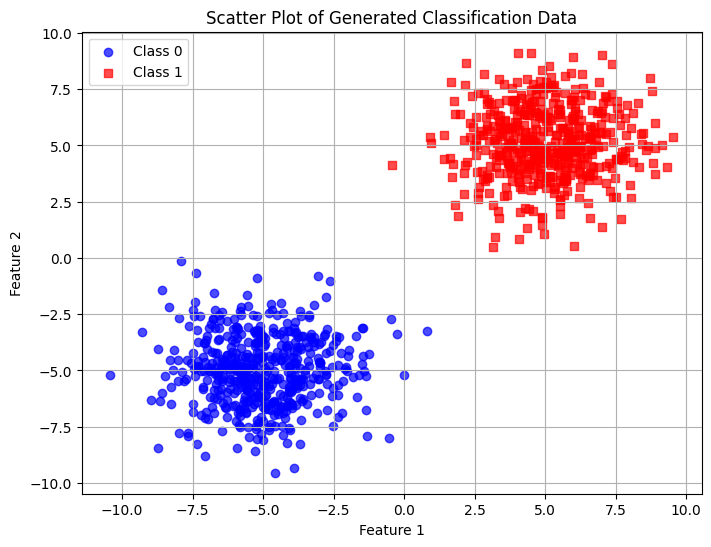

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
custom_centers = [[-5, -5], [5, 5]]
X, y = make_blobs(n_samples=1000, centers=custom_centers, n_features=2, cluster_std=1.6)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", marker="o", color="blue", alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", marker="s", color="red", alpha=0.7)

# Set labels, title, and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Generated Classification Data")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [14]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVC model
model = SVC(kernel="linear", C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

#### **Making Predictions**

Once trained, we use the `.predict()` method to classify new samples.

In [15]:
y_pred = model.predict(X_test)

#### **Extracting Support Vectors**

The trained model stores the **support vectors**, which define the decision boundary. These can be accessed via:

```python
support_vectors = model.support_vectors_
```

The **indices of the support vectors** in the training set are available as:

```python
support_indices = model.support_
```

The **Lagrange multipliers (alphas)** associated with support vectors can be retrieved using:

```python
dual_coefs = model.dual_coef_
```

In [23]:
w = model.coef_[0]
b = -model.intercept_[0]
print(w)
print(b)

[0.24368569 0.38611903]
-0.048565855213413854


Remember that the outer lines are $w_1x_1+w_2x_2 = b_u$ and $w_1x_1+w_2x_2=b_d$.  The middle line is $w_1x_1+w_2x_2=b$, where $b_u=b+1$ and $b_d=b-1$.  The width of the path is 

$$\frac{2}{\sqrt{w_1^2+w_2^2}}$$.

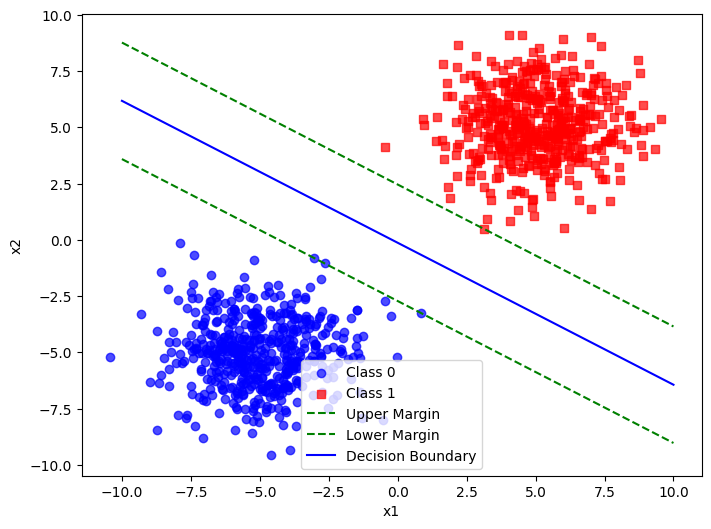

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of x-values for plotting the decision boundary and margins
x1 = np.linspace(-10, 10, 250)  # Create 250 points evenly spaced between -10 and 10

# Extract weight components from the SVM model (assuming w is a trained weight vector)
w1 = w[0]  # Weight for the first feature
w2 = w[1]  # Weight for the second feature

# Compute the upper and lower margin boundaries
bu = b + 1  # Upper margin (b is the SVM bias term)
bd = b - 1  # Lower margin

# Compute the decision boundary and margins using the SVM equation: w1*x1 + w2*x2 + b = 0
# Rearranging for x2 (y-axis): x2 = (-b - w1*x1) / w2
y1 = (bu - w1 * x1) / w2  # Upper margin
y2 = (bd - w1 * x1) / w2  # Lower margin
y0 = (b  - w1 * x1) / w2  # Decision boundary

# Create the plot
plt.figure(figsize=(8, 6))  # Set figure size for better visualization

# Scatter plot of the dataset, with different colors for each class
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", marker="o", color="blue", alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", marker="s", color="red", alpha=0.7)

# Plot the decision boundary and margins
plt.plot(x1, y1, '--', color='green', label="Upper Margin")  # Upper margin (dashed green)
plt.plot(x1, y2, '--', color='green', label="Lower Margin")  # Lower margin (dashed green)
plt.plot(x1, y0, '-', color='blue', label="Decision Boundary")  # Decision boundary (solid blue)

# Label the axes
plt.xlabel('x1')  # Label for x-axis (Feature 1)
plt.ylabel('x2')  # Label for y-axis (Feature 2)

# Show legend to differentiate decision boundary and margins
plt.legend()

# Display the plot
plt.show()


#### **Evaluating Performance**

To assess the classifier's accuracy, we compare predictions with actual labels using standard evaluation metrics.

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Detailed classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        93

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#### **Hyperparameter Tuning**

To find the best hyperparameters for **SVC**, we use `GridSearchCV` for an exhaustive search or `RandomizedSearchCV` for a randomized search.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


#### **Using SVC for Inference**

For **real-time classification**, we define a function that takes a new data point and predicts the class.

In [21]:
def classify_new(sample):
    return model.predict([sample])[0]

# Example classification
new_point = [0.5, -1.2]
prediction = classify_new(new_point)
print("Predicted class:", prediction)

Predicted class: 0


## Kernel Methods in Support Vector Machines

### Non Linear Separable Dataset

As we have seen, the effectiveness of SVMs largely depends on their ability to find an optimal decision boundary, which is typically a hyperplane in a high-dimensional feature space. However, many real-world problems involve data that is not linearly separable in its original space. As we are going to study in this section, to address this limitation, we can transform the problem into a higher-dimensional space where a linear separation becomes possible.  This transformation is achieved through a mapping function $\phi(x)$ that projects the data into a new feature space.

The challenge with this approach is that explicitly computing the transformation can be computationally expensive or even infeasible. Kernel methods circumvent this issue by implicitly performing the transformation through a kernel function, allowing SVMs to effectively handle non-linearly separable data without explicitly computing the mapped feature vectors. 

But let's start with a practical example. In the figure below, there is no way to draw a straight line or a linear separation hyperplane to distinguish the circles from the triangles.

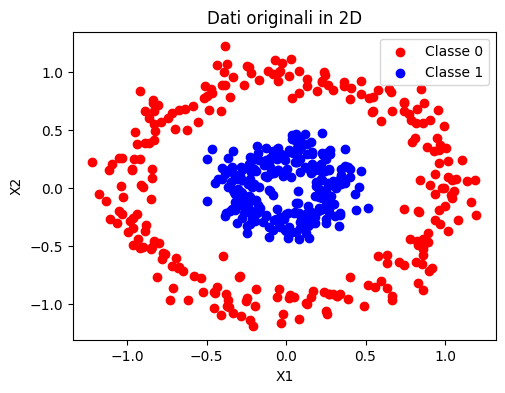

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generazione di dati casuali a simmetria circolare
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

# Visualizzazione dei dati originali in 2D
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Classe 1')
plt.title('Dati originali in 2D')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

### The Kernel Trick

If we project these data points into three dimensions, so that the triangles are elevated above the circles, we can find a separation hyperplane. Here is one way to do it. Each original point is two-dimensional, characterized by the values of $x_1$ and $x_2$ along the two axes and by a label $y$, which can be 1 (circle) or -1 (triangle). We can project these data points into three dimensions by creating a third feature, $x_1^2 + x_2^2$, which can be plotted on the $z$-axis. Thus, now each point in three dimensions is represented by $x_1$, $x_2$, and $x_1^2 + x_2^2$, which are values along the $x$, $y$, and $z$ axes, respectively. When plotted in 3D, the triangles rise above the circles, and a hyperplane can be found (as shown in the figure) that separates the two classes.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Add the possibility to modify the rotation of the plots
def plot_3d_with_rotation(elev1, azim1, elev2, azim2):
    # Generate synthetic data for the demonstration (example)
    np.random.seed(42)
    X, y = make_circles(n_samples=500, factor=0.3, noise=0.1)

    # Add a non-linear feature (map to a higher dimension) to make the data separable using a linear kernel
    X1 = X[:, 0]  # First feature
    X2 = X[:, 1]  # Second feature
    X3 = X1 ** 2 + X2 ** 2  # Non-linear mapping to a higher dimension

    # Create the figure
    fig = plt.figure(figsize=(12, 6))

    # First subplot: Scatter plot of the data in 3D (with the non-linear feature added)
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X1[y == 0], X2[y == 0], X3[y == 0], color='red', label='Class 0')  # Points for Class 0
    ax1.scatter(X1[y == 1], X2[y == 1], X3[y == 1], color='blue', label='Class 1')  # Points for Class 1
    ax1.set_title('Data in 3D (Non-linear Mapping)')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')
    ax1.legend()
    ax1.view_init(elev=elev1, azim=azim1)  # Set the rotation for the first plot

    # Train an SVM with a linear kernel using the transformed 3D data
    clf = SVC(kernel='linear')  # Support Vector Classifier with linear kernel
    X_3d = np.c_[X1, X2, X3]  # Combine the 3 features into a single dataset
    clf.fit(X_3d, y)  # Train the model on the 3D data

    # Second subplot: Visualize the separating hyperplane in 3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(X1[y == 0], X2[y == 0], X3[y == 0], color='red', label='Class 0')  # Points for Class 0
    ax2.scatter(X1[y == 1], X2[y == 1], X3[y == 1], color='blue', label='Class 1')  # Points for Class 1

    # Extract the hyperplane parameters (weights and bias)
    w = clf.coef_[0]  # Coefficients for the hyperplane
    b = clf.intercept_[0]  # Bias term

    # Generate a grid to plot the hyperplane
    x1_range = np.linspace(X1.min() - 1, X1.max() + 1, 50)  # Range for X1
    x2_range = np.linspace(X2.min() - 1, X2.max() + 1, 50)  # Range for X2
    X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)  # Create a grid of X1 and X2 values
    X3_grid = (-w[0] * X1_grid - w[1] * X2_grid - b) / w[2]  # Compute X3 for the hyperplane

    # Plot the hyperplane as a surface
    ax2.plot_surface(X1_grid, X2_grid, X3_grid, alpha=0.3, color='yellow')  # Semi-transparent yellow surface
    ax2.set_title('Linear Separating Hyperplane in 3D')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('X3')
    ax2.legend()
    ax2.view_init(elev=elev2, azim=azim2)  # Set the rotation for the second plot

    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

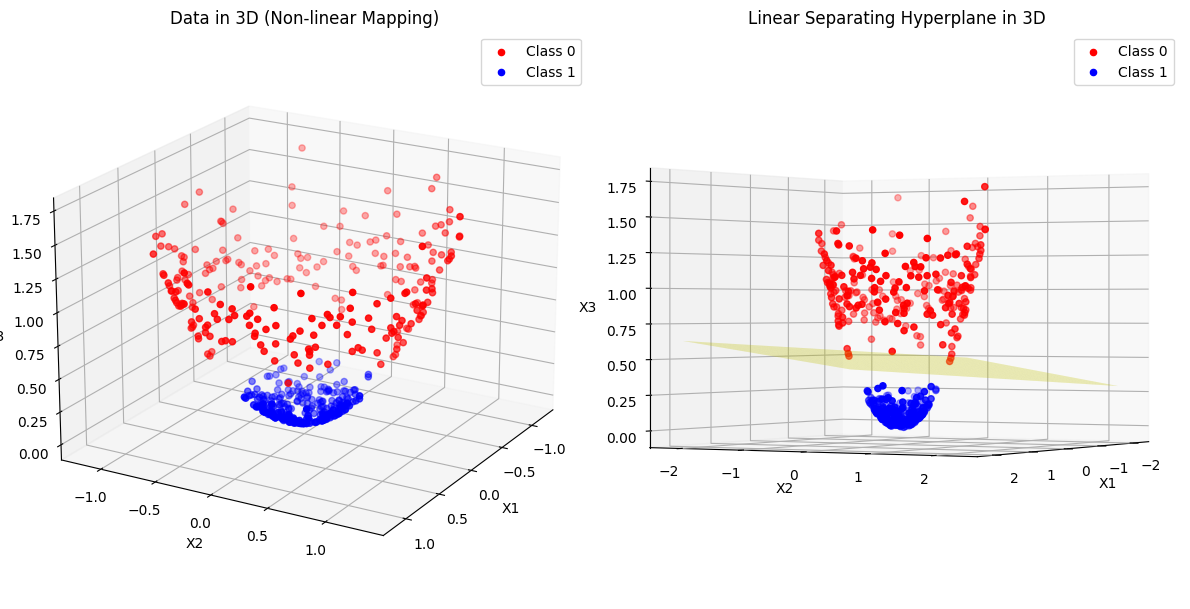

In [33]:
# Call the function with specific rotation angles for the two plots
plot_3d_with_rotation(elev1=20, azim1=30, elev2=0, azim2=30)

For the problem we just tackled, it was not difficult to find a third feature that allowed us to separate the data into two groups. But what happens if the 2D data looks like the figure below? 

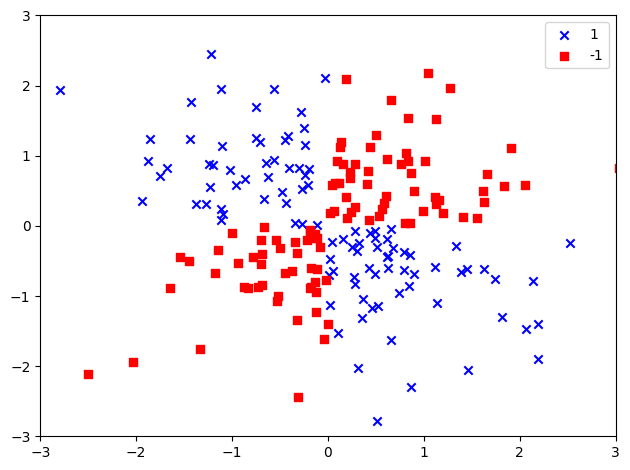

In [34]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Now it’s not immediately clear what to choose as the third feature; $x_1^2 + x_2^2$ no longer works. We need a rigorous method to project the data into higher dimensions. It must work even if the low-dimensional space is itself much higher than 2D (and thus impossible to visualize). Moreover, once the data is projected into higher dimensions, finding a linearly separable hyperplane in the augmented space requires computing the dot product of vectors in higher dimensions, which, as we have said, can become computationally unmanageable.

So, in some way, the algorithm must simultaneously achieve two things:  
- 1. **create new features** so that they can be mapped into a higher-dimensional space, and  

<p>

- 2. **avoid performing dot products** in this new space while still being able to find the separating hyperplane.

Let's start with data in two dimensions and map it into three dimensions using three features.  
Given a vector $x$ in the lower-dimensional space (2D in our case), it is mapped to the vector $\phi(x)$ in the higher-dimensional space (3D in our case):  

$$
x \to \phi(x)
$$

Our mapping is as follows: $[x_1 \; x_2] \to [x_1^2 \; x_2^2 \; \sqrt{2}x_1x_2]$.  
Thus, if a point $a$ in 2D is given by $[a_1 \; a_2]$ and a point $b$ is given by $[b_1 \; b_2]$, the same points, projected into 3D space, become:  

$$
[a_1^2 \; a_2^2 \; \sqrt{2}a_1a_2], \quad [b_1^2 \; b_2^2 \; \sqrt{2}b_1b_2].
$$

To find a linearly separable hyperplane, we would need to compute the dot products of the points' vectors in the higher-dimensional space. In this example, it is not a problem to compute the dot products of all vectors in 3D space.  
Unfortunately, in the real world, the dimensionality of the augmented space can be enormous, making such calculations computationally prohibitive in terms of resources (both time and memory). However, Aizerman, Braverman, and Rozonoer [REF] devised a very useful trick that completely bypassed this difficulty.

In other words, to find the linearly separable hyperplane in the higher-dimensional space, we would need to compute the dot products of $\phi(x_i)$ with $\phi(x_j)$, for all combinations of $i$ and $j$. But what if we could perform these calculations with the two lower-dimensional vectors, $x_i$ and $x_j$, which give the same result as the dot product of the vectors corresponding to them in the higher-dimensional space? What if we could find a function $K$ such that:

$$
K(x_i, x_j) \to \phi(x_i) \cdot \phi(x_j)
$$

In other words, if the two lower-dimensional vectors are passed to the function $K$, it should return a value equal to the dot product of the vectors projected into the higher-dimensional space. Let’s look at a concrete example of the vectors $a$ and $b$:

$$
a = [a_1 \; a_2], \quad b = [b_1 \; b_2].
$$

\begin{align*}
\phi(a) &= [a_1^2, a_2^2, \sqrt{2}a_1a_2] \\
& \\
\phi(b) &= [b_1^2, b_2^2, \sqrt{2}b_1b_2]
\end{align*}


\begin{align*}
\phi(a) \cdot \phi(b) &= [a_1^2, a_2^2, \sqrt{2}a_1a_2] \cdot [b_1^2, b_2^2, \sqrt{2}b_1b_2]\\
& \\
& = (a_1^2b_1^2 + a_2^2b_2^2 + 2a_1a_2b_1b_2)
\end{align*}

We need a function $K$ that produces the same result. Here is one such function:  

$$
K(x, y) = (x \cdot y)^2
$$

Let's feed this function with the two lower-dimensional vectors $a$ and $b$ and see what happens:

\begin{align*}
K(a, b) &= (a \cdot b)^2 = ([a_1, a_2] \cdot [b_1, b_2])^2 \\
&= (a_1b_1 + a_2b_2)^2 \\
&= (a_1^2b_1^2 + a_2^2b_2^2 + 2a_1a_2b_1b_2)
\end{align*}

So:

$$
K(a, b) = \phi(a) \cdot \phi(b)
$$

Since we have only worked with 2D spaces, the significance of this fact may not be immediately obvious. Imagine, for a moment, that $a$ and $b$ are 100-dimensional vectors and that $\phi(a)$ and $\phi(b)$ have a million dimensions. If we can find an appropriate mapping $\phi(x)$ such that $K(x, x) = \phi(x) \cdot \phi(x)$, then we can compute the dot products of high-dimensional vectors without ever explicitly working in that million-dimensional space. We can perform the calculations in "just" 100 dimensions.

The function $K$ is called a "kernel function." The method that uses the kernel function to compute dot products in a higher-dimensional space without explicitly transforming each lower-dimensional vector into its monstrously large counterpart is sometimes called the "kernel trick." It is indeed a very useful trick.

### The Polynomial Kernel

SVC Method can use a number of kernel functions. One of them is known as the "polynomial kernel," introduced by MIT computational neuroscientist Tomaso Poggio in 1975. The general form of the polynomial kernel is:

$$
K(x, y) = (c + x \cdot y)^d, \quad \text{where } c \text{ and } d \text{ are two constants.}
$$

In the specific case where the constants are $c = 0$ and $d = 2$, we obtain the kernel we just used for the previous example:

$$
K(x, y) = (x \cdot y)^2
$$

Let’s experiment with another variant, where the constants are $c = 1$ and $d = 2$, to better understand why it works.

$$
K(x, y) = (1 + x \cdot y)^2
$$

For 2D points:

$$
a = [a_1 \; a_2], \quad b = [b_1 \; b_2]
$$

We get:

\begin{align*}
K(a, b) &= (1 + [a_1 \; a_2] \cdot [b_1 \; b_2])^2 \\
&= (1 + a_1b_1 + a_2b_2)^2 \\
&= 1 + (a_1b_1 + a_2b_2) + 2(a_1b_1 + a_2b_2) \\
&= 1 + a_1^2b_1^2 + a_2^2b_2^2 + 2a_1a_2b_1b_2 + 2a_1b_1 + 2a_2b_2
\end{align*}

The question now is: what must the mapping $\phi(x)$ be such that:

$$
K(x, x) = \phi(x) \cdot \phi(x)
$$

With a bit of patience, we can discover this mapping:

$$
x \to \phi(x)
$$

$$
\Rightarrow [x_1, x_2] \to [1, x_1^2, x_2^2, \sqrt{2}x_1x_2, \sqrt{2}x_1, \sqrt{2}x_2]
$$

I have added commas to separate the elements of the larger vector just for clarity; normally, they are not used.

So:

$$
a = [a_1, a_2] \to [1, a_1^2, a_2^2, \sqrt{2}a_1a_2, \sqrt{2}a_1, \sqrt{2}a_2]
$$

$$
b = [b_1, b_2] \to [1, b_1^2, b_2^2, \sqrt{2}b_1b_2, \sqrt{2}b_1, \sqrt{2}b_2]
$$

We now have the 2D coordinates, or vectors, $a$ and $b$ transformed into their 6D counterparts, $\phi(a)$ and $\phi(b)$. The question is: does $\phi(a) \cdot \phi(b)$, evaluated in 6D space, yield the same result as the kernel function applied to $a$ and $b$ in 2D space? Let's verify:

\begin{align*}
\phi(a) \cdot \phi(b) & = [1, a_1^2, a_2^2, \sqrt{2}a_1a_2, \sqrt{2}a_1, \sqrt{2}a_2] \cdot [1, b_1^2, b_2^2, \sqrt{2}b_1b_2, \sqrt{2}b_1, \sqrt{2}b_2] \\
& = 1 + a_1^2b_1^2 + a_2^2b_2^2 + 2a_1a_2b_1b_2 + 2a_1b_1 + 2a_2b_2 \\
& = K(a, b)
\end{align*}

They are equal. Therefore, the kernel function allows us to compute the dot product of 6D vectors without explicitly computing them in 6D space. For our polynomial kernel, we used the values 1 and 2 for the two constants, respectively.

It can be shown that the kernel function works for any values of these constants. Thus, we can project data into increasingly higher dimensions, where it is more likely to find a linearly separable hyperplane.

As a side note, the dimensionality of the higher-dimensional space is:

$$
\frac{(n + d)!}{n! \, d!}
$$

where $n$ is the dimensionality of the original lower-dimensional space, and $d$ is the value of the constant used in the polynomial kernel. 

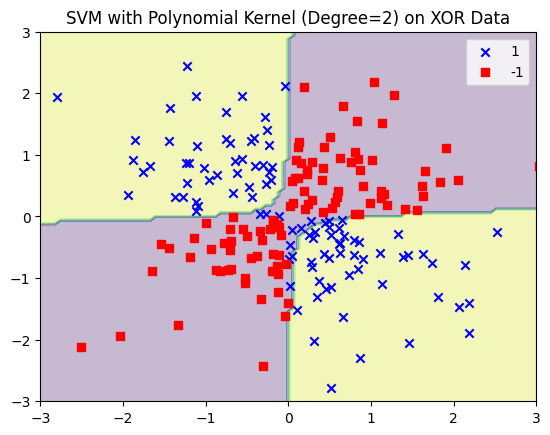

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=2, coef0=1, C=10)  # degree=2 works well for XOR
svm_poly.fit(X_xor, y_xor)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title("SVM with Polynomial Kernel (Degree=2) on XOR Data")
plt.show()


### Understanding the Radial Basis Function (RBF) Kernel in SVM

The **Radial Basis Function (RBF) kernel** is another powerful tool that allows SVM to handle complex, nonlinear decision boundaries. Instead of working directly with the original data, the RBF kernel transforms it into a new space where it becomes easier to separate classes.

The fundamental idea behind the RBF kernel is that data points that are **close to each other** should have a **stronger relationship** than points that are far apart. The function measures the similarity between two points based on their **Euclidean distance**. If two points are very close, the function assigns them a high similarity value; if they are far apart, the similarity decreases exponentially.

Mathematically, the RBF kernel is defined as:

$$
K(x, x') = \exp\left(-\gamma \| x - x' \|^2\right)
$$

where $ x $ and $ x' $ are two data points, $ \| x - x' \|^2 $ represents their squared Euclidean distance, and $ \gamma $ is a parameter that controls how much influence a single training example has.

The parameter $ \gamma $ plays a crucial role in determining the behavior of the RBF kernel. A **small $ \gamma $** means that the function varies smoothly, meaning that even distant points are considered similar to some extent. A **large $ \gamma $**, on the other hand, makes the function decay rapidly, meaning that only points very close to each other are considered similar. Choosing an appropriate $ \gamma $ is essential for ensuring good model performance.

One of the key advantages of the RBF kernel is that it allows SVM to create flexible decision boundaries that can adapt to complex patterns in the data. Unlike polynomial kernels, which can lead to overly complex models with high-degree polynomials, the RBF kernel provides a more balanced approach by smoothly adapting to the structure of the data.

To see how the RBF kernel works in practice, consider an example where we classify two groups of points that are not linearly separable. In the original space, no straight line can effectively separate them. However, when we apply the RBF kernel, the data is projected into a higher-dimensional space, making it possible for SVM to find a linear separation.

#### Example Using Python and Scikit-Learn
Let's implement an example using `scikit-learn` to demonstrate how an SVM with an RBF kernel can classify non-linearly separable data.

Accuracy of SVM with RBF kernel: 1.00


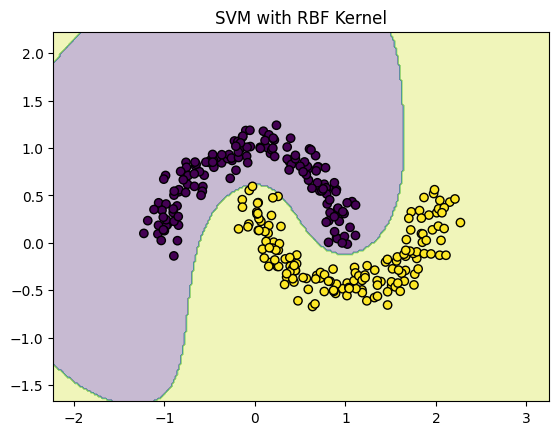

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data (moons dataset)
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_rbf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM with RBF kernel: {accuracy:.2f}")

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM with RBF Kernel")
    plt.show()

plot_decision_boundary(svm_rbf, X, y)

In this example, we use the **moons dataset**, which consists of two interleaving half-circle shapes that cannot be separated by a straight line. We train an SVM with an RBF kernel and then visualize the decision boundary. The model successfully captures the complex pattern in the data, creating a curved boundary that effectively separates the two classes.

The RBF kernel is one of the most effective tools for handling nonlinear data in SVM. By mapping data points into a higher-dimensional space based on their relative distances, it allows SVM to learn complex decision boundaries. The choice of the $ \gamma $ parameter is crucial, as it determines the sensitivity of the model to individual data points. When used correctly, the RBF kernel enables SVM to perform well on a wide range of classification tasks, even when the data exhibits intricate patterns that cannot be captured by a simple linear model.

One of the most remarkable properties of the **Radial Basis Function (RBF) kernel** is that it implicitly maps the input data into an **infinite-dimensional feature space**. This is one of the key reasons why it is so powerful and widely used in Support Vector Machines (SVM). To understand why, we need to analyze the mathematical structure of the RBF kernel and its connection to function approximation.

#### Understanding the Infinite-Dimensional Mapping 

At this point the reader should know that, when working with SVM, the idea of using a **kernel function** is to implicitly transform data into a new space where a **linear separation** is possible. Unlike explicit transformations (such as polynomial features, which generate new variables explicitly), the RBF kernel **performs this transformation implicitly**, without computing the actual coordinates in the new space.  

We re-write the definition of the RBF kernel:

$$
K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
$$

This function measures the similarity between two points $ x $ and $ x' $ based on their Euclidean distance. However, if we attempt to express this transformation in an explicit feature space, we would find that it requires an **infinite number of dimensions**. The reason for this comes from **Mercer’s theorem**, which states that a positive definite kernel corresponds to a dot product in some feature space.  

In the case of the RBF kernel, it can be shown that the corresponding feature space consists of an **infinite sum of polynomial terms**. In other words, using the RBF kernel is equivalent to computing all possible polynomial transformations of the data, up to infinite degree.  

To understand this, recall the Taylor series expansion of the exponential function:

$$
e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}
$$

If we expand the RBF kernel using this series, we obtain:

$$
K(x, x') = \sum_{k=0}^{\infty} \frac{(-\gamma \|x - x'\|^2)^k}{k!}
$$

This sum represents an infinite-dimensional feature space, where each term corresponds to a polynomial of increasing degree. This means that the RBF kernel is not just mapping data to a finite-dimensional space (as a polynomial kernel does) but instead to an **infinite-dimensional Hilbert space**.  

Since SVM only requires computing the dot product between transformed points, we **never explicitly construct this infinite space**. Instead, the kernel trick allows us to compute the result directly in the original space, avoiding the computational burden of handling infinite-dimensional vectors.


#### Connection to Universal Function Approximation 

The fact that the RBF kernel corresponds to an **infinite-dimensional feature space** has a profound implication: it makes the SVM with an RBF kernel a **universal function approximator**. This means that, given enough training data and the right hyperparameters, an SVM with an RBF kernel can approximate **any continuous function** arbitrarily well.  

This property is analogous to the **universal approximation theorem** in neural networks, which states that a neural network with at least one hidden layer and a nonlinear activation function can approximate any function. The key reason why this happens in SVM with an RBF kernel is that the infinite set of basis functions generated by the kernel allows it to **capture any complex pattern in the data**.  

More formally, the RBF kernel satisfies the **Stone-Weierstrass theorem**, which states that a sufficiently rich set of basis functions can approximate any continuous function. Because the RBF kernel can be written as an infinite expansion of polynomials, it has the capacity to approximate **any smooth decision boundary** with enough support vectors.

In practice, this means that an SVM with an RBF kernel can **separate data with arbitrarily complex boundaries**, as long as the right values for hyperparameters like $ \gamma $ and $ C $ are chosen. However, this also means that the model **can overfit** if $ \gamma $ is set too high, because it will effectively memorize the training points rather than generalizing.

## Appendix

### Distance Between two Parallel Lines

The formula for the perpendicular distance $d$ between two parallel lines in the form $Ax + By + C_1 = 0$ and $Ax + By + C_2 = 0$ is given by:

$$
d = \frac{|C_2 - C_1|}{\sqrt{A^2 + B^2}}
$$

**Explanation**:

- $A$ and $B$ are the coefficients of $x$ and $y$ in the equations of the lines.
<p>
- $C_1$ and $C_2$ are the constant terms in the respective equations.
<p>
- The numerator $|C_2 - C_1|$ represents the absolute difference between the intercepts of the lines (after normalization).
<p>
- The denominator $\sqrt{A^2 + B^2}$ is the magnitude (or norm) of the vector $(A, B)$, which is perpendicular to the lines.

This formula calculates the shortest distance between the two parallel lines.

### Full Derivation of Eq. 4

To derive equation [4] step by step, we proceed as follows:

**Step 1: Lagrangian Function**

We start with the given Lagrangian function:

$$
L = \frac{1}{2} \|\mathbf{w}\|^2 - \sum\limits_{n=1}^N \alpha_n \left[ y^{(n)} \left( \mathbf{w}^T \mathbf{x}^{(n)} + w_0 \right) -1 \right]
$$

Expanding the norm:

$$
\|\mathbf{w}\|^2 = \mathbf{w}^T \mathbf{w}
$$

Thus, we rewrite $ L $ as:

$$
L = \frac{1}{2} \mathbf{w}^T \mathbf{w} - \sum\limits_{n=1}^N \alpha_n y^{(n)} \mathbf{w}^T \mathbf{x}^{(n)} - \sum\limits_{n=1}^N \alpha_n y^{(n)} w_0 + \sum\limits_{n=1}^N \alpha_n
$$

Using equation $ \eqref{eq:7.8} $:

$$
\sum\limits_{n=1}^N \alpha_n y^{(n)} = 0
$$

This implies that the term $ - \sum\limits_{n=1}^N \alpha_n y^{(n)} w_0 $ vanishes:

$$
L = \frac{1}{2} \mathbf{w}^T \mathbf{w} - \sum\limits_{n=1}^N \alpha_n y^{(n)} \mathbf{w}^T \mathbf{x}^{(n)} + \sum\limits_{n=1}^N \alpha_n
$$

**Step 2: Substituting $ \mathbf{w} $**

From equation $ \eqref{eq:7.9} $, we substitute:

$$
\mathbf{w} = \sum\limits_{n=1}^N \alpha_n y^{(n)} \mathbf{x}^{(n)}
$$

Computing $ \mathbf{w}^T \mathbf{w} $:

$$
\mathbf{w}^T \mathbf{w} = \left( \sum\limits_{i=1}^N \alpha_i y^{(i)} \mathbf{x}^{(i)} \right)^T \left( \sum\limits_{j=1}^N \alpha_j y^{(j)} \mathbf{x}^{(j)} \right)
$$

Expanding the dot product:

$$
\mathbf{w}^T \mathbf{w} = \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)} y^{(j)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(j)}
$$

Thus,

$$
\frac{1}{2} \mathbf{w}^T \mathbf{w} = \frac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)} y^{(j)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(j)}
$$

Also,

$$
\sum\limits_{n=1}^N \alpha_n y^{(n)} \mathbf{w}^T \mathbf{x}^{(n)} = \sum\limits_{n=1}^N \alpha_n y^{(n)} \left( \sum\limits_{i=1}^N \alpha_i y^{(i)} \mathbf{x}^{(i)} \right)^T \mathbf{x}^{(n)}
$$

Expanding,

$$
\sum\limits_{n=1}^N \alpha_n y^{(n)} \sum\limits_{i=1}^N \alpha_i y^{(i)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(n)}
$$

Rearranging sums:

$$
\sum\limits_{i=1}^N \sum\limits_{n=1}^N \alpha_i \alpha_n y^{(i)} y^{(n)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(n)}
$$

Since this is symmetric in indices $ i $ and $ n $, it is the same double sum as above.

**Step 3: Final Expression**

Substituting into $ L $:

$$
L = \sum\limits_{n=1}^N \alpha_n - \frac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)} y^{(j)} \mathbf{x}^{(i)} \cdot \mathbf{x}^{(j)}
$$

Thus, we have derived the final result:

$$
L = \sum\limits_{n=1}^N \alpha_n - \frac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)} y^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
$$

## Reference and Credits

The fundamental paper about kernel method:

- Aizerman, M.A., Braverman, E.M. and Rozonoer, L.I. (1964) "***Theoretical Foundations of Potential Function Method in Pattern Recognition***". Automation and Remote Control, 25, 917-936.